In [78]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy as sp
import random
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [79]:
classes={'notumor':0,'glioma':1,'meningioma':2,'pituitary':3}

In [80]:
# Load and preprocessing the into trainig and testing
def load_data(path):
    images=[]
    labels=[]
    for folder in os.listdir(path):
        for file in os.listdir(path+folder):
            img=cv2.imread(path+folder+'/'+file)
            img=cv2.resize(img,(150,150))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            images.append(img)
            labels.append(classes[folder])
    return images,labels

#### Dataset 1

In [81]:
x_train,y_train=load_data('/content/drive/MyDrive/Training/')

In [82]:
x_test,y_test=load_data('/content/drive/MyDrive/Testing/')

In [83]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (5722, 150, 150)
Shape of y_train:  (5722,)
Shape of x_test:  (1311, 150, 150)
Shape of y_test:  (1311,)


#### Analysis of class-wise data

Number of samples:  5722
Number of features:  150
Number of classes:  4
Number of samples per class: 
0: 1595
1: 1331
2: 1339
3: 1457


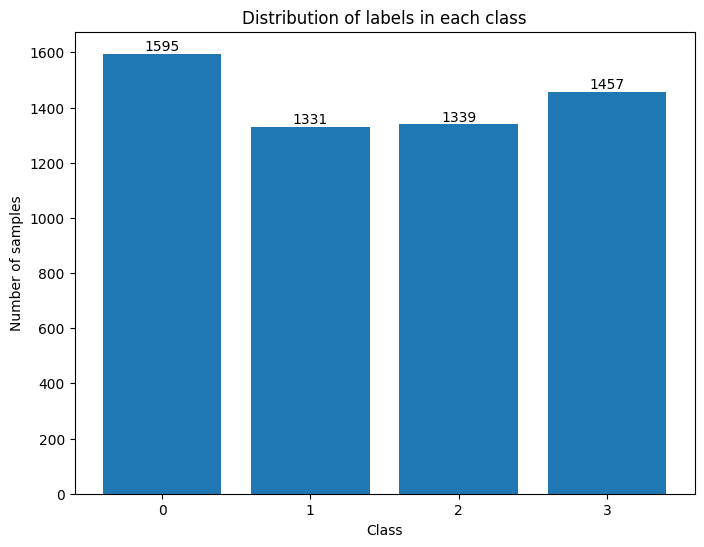

In [84]:
#analyse the dataset features
def analyse_data(x, y):
    print("Number of samples: ", x.shape[0])
    print("Number of features: ", x.shape[1])
    unique_classes, counts = np.unique(y, return_counts=True)
    print("Number of classes: ", len(unique_classes))
    print("Number of samples per class: ")
    for cls, count in zip(unique_classes, counts):
        print(f"{cls}: {count}")

    plt.figure(figsize=(8, 6))
    bars = plt.bar(unique_classes, counts, width=0.8, align='center')
    plt.xlabel('Class')
    plt.ylabel('Number of samples')
    plt.title('Distribution of labels in each class')
    plt.xticks(unique_classes)
    # plt.grid(True)
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
                 ha='center', va='bottom')

    plt.show()

analyse_data(x_train,y_train)

In [85]:
# Normalize the data
x_train=x_train/255.0
x_test=x_test/255.0

In [86]:
no_tumor=[]
glioma_tumor=[]
meningioma_tumor=[]
pituitary_tumor=[]
for i in range(len(x_train)):
    if y_train[i]==0:
        no_tumor.append(x_train[i])
    elif y_train[i]==1:
        glioma_tumor.append(x_train[i])
    elif y_train[i]==2:
        meningioma_tumor.append(x_train[i])
    else:
        pituitary_tumor.append(x_train[i])

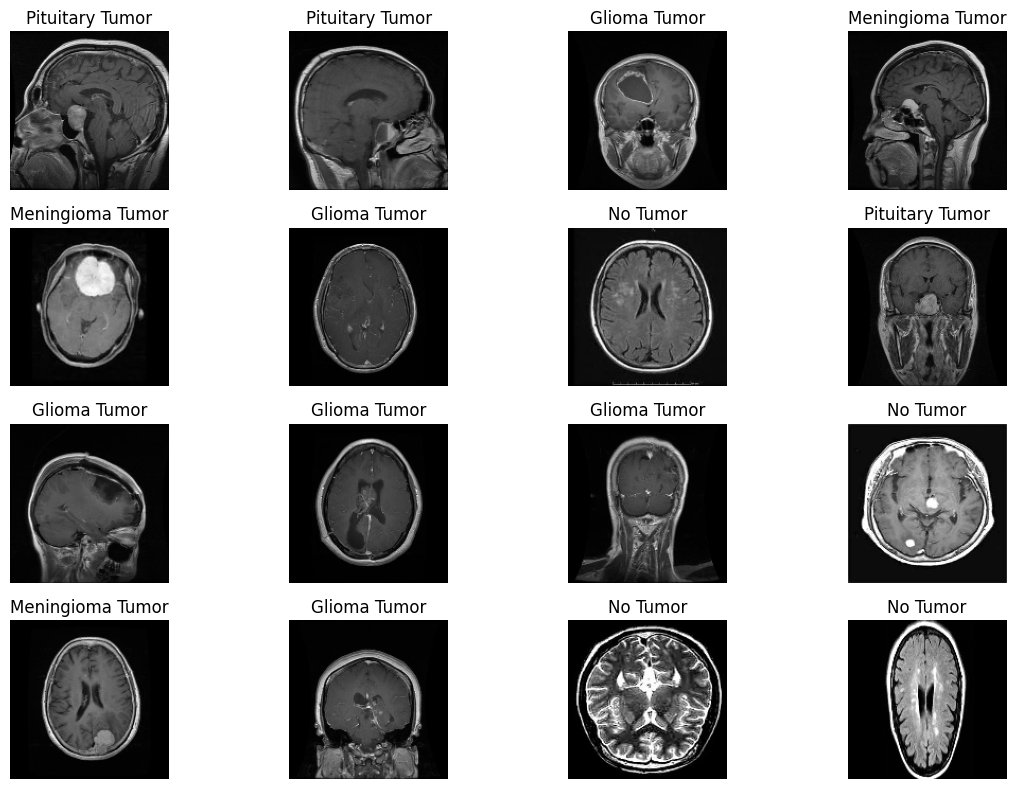

In [87]:
all_images = [(image, "No Tumor") for image in no_tumor] + [(image, "Glioma Tumor") for image in glioma_tumor] + [(image, "Meningioma Tumor") for image in meningioma_tumor] + [(image, "Pituitary Tumor") for image in pituitary_tumor]

# Shuffle the list
random.shuffle(all_images)
images=[i[0] for i in all_images]
labels=[i[1] for i in all_images]

# Plot 4 random images from each subclass with their respective labels
plt.figure(figsize=(12, 8))
for i in range(4):
    for j in range(4):
        index = i * 4 + j
        image, label = all_images[index]
        plt.subplot(4, 4, index + 1)
        plt.imshow(image, cmap='gray')
        plt.title(label)
        plt.axis('off')
plt.tight_layout()
plt.show()

#### Analyse the image

Image shape:  (150, 150)
Image type:  float64
Image min value:  0.0
Image max value:  0.8862745098039215
Image mean value:  0.17909159041394332
Image std value:  0.15550187302220245


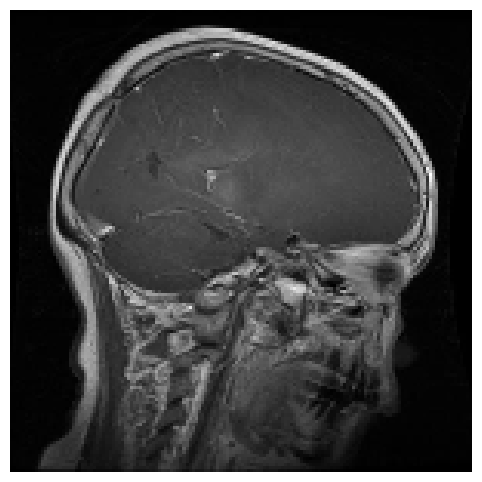

In [88]:
#perform analysis on the dataset
def analyse_image(image):
    print("Image shape: ", image.shape)
    print("Image type: ", image.dtype)
    print("Image min value: ", image.min())
    print("Image max value: ", image.max())
    print("Image mean value: ", image.mean())
    print("Image std value: ", image.std())
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

analyse_image(x_train[0])

#### data distribution based on first and second feature

<ipython-input-89-612858dd0ded>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(unique_classes))
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


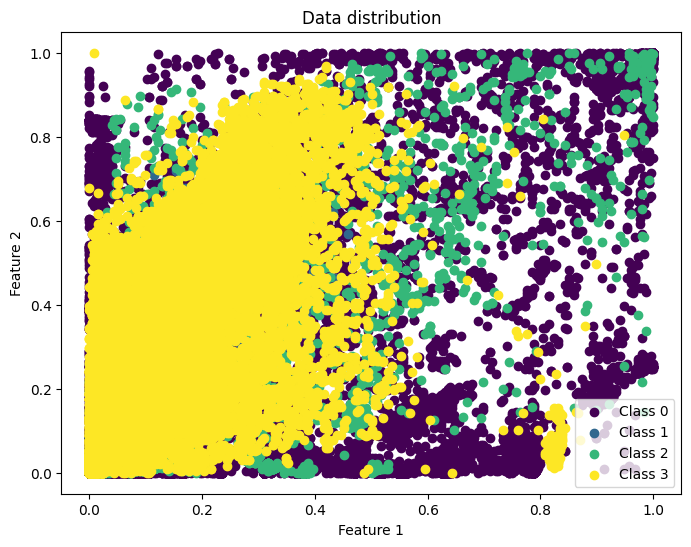

In [89]:
def plot_data(x, y):
    unique_classes = np.unique(y)
    color_map = plt.cm.get_cmap('viridis', len(unique_classes))

    plt.figure(figsize=(8, 6))
    for i, cls in enumerate(unique_classes):
        class_data = x[y == cls]
        plt.scatter(class_data[:, 0], class_data[:, 1], c=[color_map(i)], label=f'Class {cls}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Data distribution')
    plt.legend()
    # plt.grid(True)
    plt.show()

plot_data(x_train,y_train)


In [90]:
print("Before reshaping: ", x_train.shape, x_test.shape)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
print("After reshaping: ", x_train.shape, x_test.shape)

Before reshaping:  (5722, 150, 150) (1311, 150, 150)
After reshaping:  (5722, 22500) (1311, 22500)


In [91]:
# calculate mean and standard deviation of the training data
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

print("Mean shape: ", mean.shape)
print("Standard deviation shape: ", std.shape)

print("Mean ",mean)
print("Standard deviation ",std)

Mean shape:  (22500,)
Standard deviation shape:  (22500,)
Mean  [0.02286599 0.01630035 0.01687604 ... 0.01687878 0.01667866 0.02322443]
Standard deviation  [0.10372415 0.0739794  0.07585146 ... 0.07880572 0.07908153 0.10745228]


#### Neural Networks

In [92]:
x_train=x_train.reshape(x_train.shape[0],150,150,1)

x_test=x_test.reshape(x_test.shape[0],150,150,1)

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

#evaluate the model
loss,accuracy=model.evaluate(x_test,y_test)
print("Accuracy: ",accuracy)

Epoch 1/10
179/179 [==============================] - 259s 1s/step - loss: 0.7255 - accuracy: 0.6963 - val_loss: 0.5244 - val_accuracy: 0.7879
Epoch 2/10
179/179 [==============================] - 252s 1s/step - loss: 0.4014 - accuracy: 0.8495 - val_loss: 0.3823 - val_accuracy: 0.8391
Epoch 3/10
179/179 [==============================] - 261s 1s/step - loss: 0.2973 - accuracy: 0.8894 - val_loss: 0.2760 - val_accuracy: 0.8909
Epoch 4/10
179/179 [==============================] - 254s 1s/step - loss: 0.2320 - accuracy: 0.9156 - val_loss: 0.2562 - val_accuracy: 0.9092
Epoch 5/10
179/179 [==============================] - 256s 1s/step - loss: 0.1914 - accuracy: 0.9273 - val_loss: 0.1750 - val_accuracy: 0.9451
Epoch 6/10
179/179 [==============================] - 259s 1s/step - loss: 0.1423 - accuracy: 0.9484 - val_loss: 0.1712 - val_accuracy: 0.9375
Epoch 7/10
179/179 [==============================] - 256s 1s/step - loss: 0.1013 - accuracy: 0.9652 - val_loss: 0.1377 - val_accuracy: 0.9573

In [94]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
print("Accuracy: ",accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)

#find number of tested samples
total = np.sum(cm)
print("Total number of tested samples: ", total)
print("Number of correctly classified samples: ", np.trace(cm))



41/41 [==============================] - 17s 415ms/step
Accuracy:  0.965675057208238
[[405   0   0   0]
 [  0 282  17   1]
 [  7  13 279   7]
 [  0   0   0 300]]
Total number of tested samples:  1311
Number of correctly classified samples:  1266


<Figure size 1000x700 with 0 Axes>

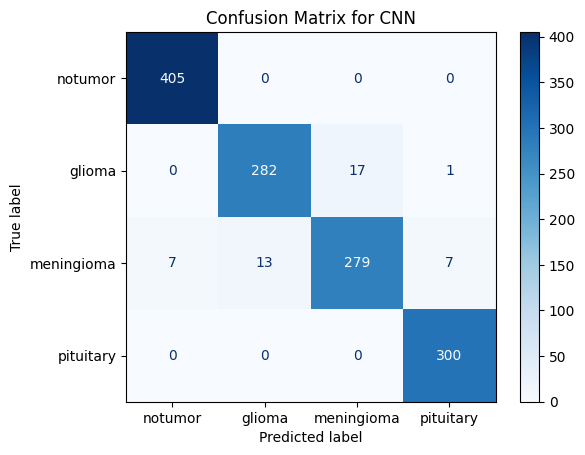

In [95]:
plt.figure(figsize=(10, 7))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes.keys())
disp.plot(cmap='Blues')

plt.title('Confusion Matrix for CNN')
plt.show()

In [96]:
print("Classification report")
print(classification_report(y_test, y_pred, target_names=classes.keys()))


Classification report
              precision    recall  f1-score   support

     notumor       0.98      1.00      0.99       405
      glioma       0.96      0.94      0.95       300
  meningioma       0.94      0.91      0.93       306
   pituitary       0.97      1.00      0.99       300

    accuracy                           0.97      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.97      0.97      0.97      1311



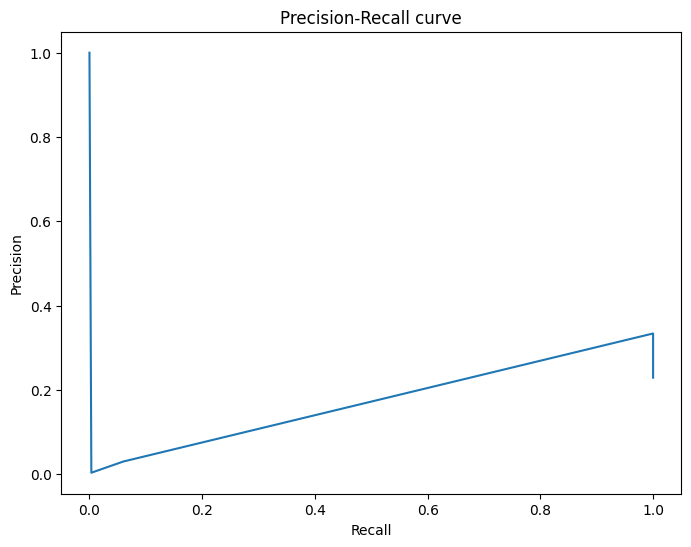

In [97]:
precision, recall, _ = precision_recall_curve(y_test, y_pred, pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

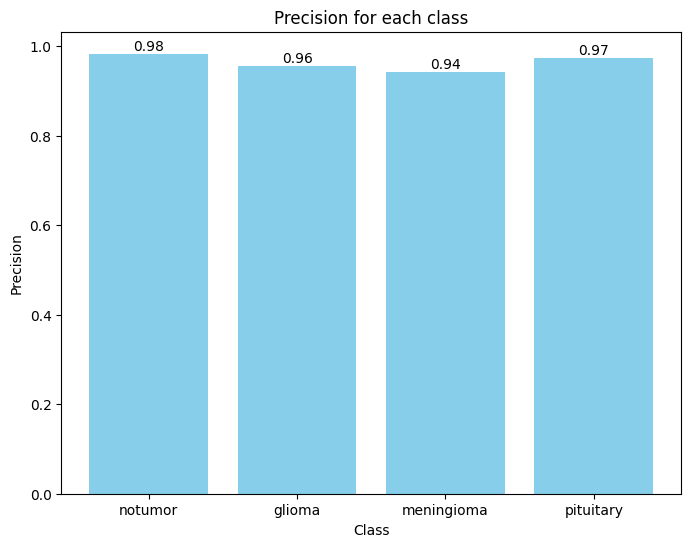

In [98]:
precision = precision_score(y_test, y_pred, average=None)
plt.figure(figsize=(8, 6))
bars = plt.bar(classes.keys(), precision, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for each class')

for bar, score in zip(bars, precision):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.show()

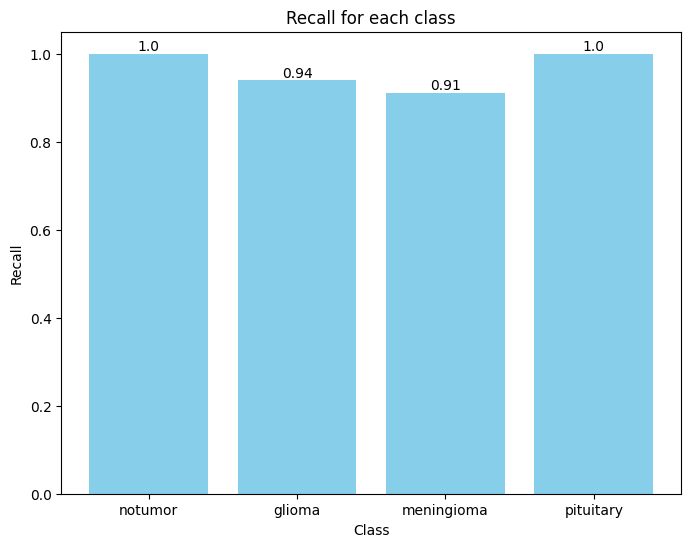

In [99]:
recall = recall_score(y_test, y_pred, average=None)
plt.figure(figsize=(8, 6))
bars = plt.bar(classes.keys(), recall, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall for each class')

for bar, score in zip(bars, recall):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.show()

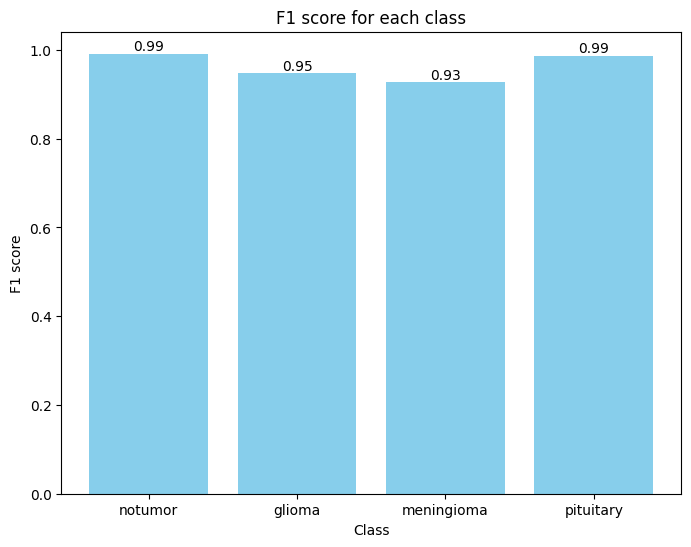

In [100]:
f1 = f1_score(y_test, y_pred, average=None)
plt.figure(figsize=(8, 6))
bars = plt.bar(classes.keys(), f1, color='skyblue')
plt.xlabel('Class')
plt.ylabel('F1 score')
plt.title('F1 score for each class')

for bar, score in zip(bars, f1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')